In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
x = [[0,0], [1,1], [2,2], [3,3]]
class_x = [0, 0, 1, 1]

In [27]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x, class_x) 
print(neigh.predict([[1.5,2]]))
print(neigh.predict_proba([[2,2]]))

[1]
[[0.33333333 0.66666667]]


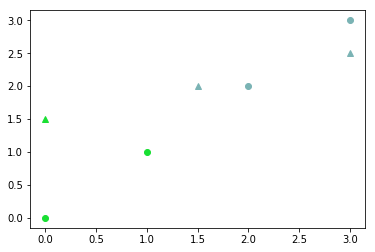

In [75]:
import matplotlib.pyplot as plt

def ArraytoCoor(H):
    x_coor = [point[0] for point in H]
    y_coor = [point[1] for point in H]
    coor=[]
    coor.append(x_coor)
    coor.append(y_coor)
    return coor

import random

def gencolor(number):
    color = []
    for i in range(number):
        color.append([random.randint(0, 255)/255,
                      random.randint(0, 255)/255,
                      random.randint(0, 255)/255])
    return color

sample = ArraytoCoor(x)
n_class = len(set(class_x))
class_color = gencolor(n_class)

for i in range(len(x)):
    n_ = [sample[0][i],sample[1][i]]
    plt.plot(n_[0],n_[1],'o',color=class_color[class_x[i]])

#predict new datapoints
new_dp = [[1.5,2],[0,1.5],[3,2.5]]
result = neigh.predict(new_dp)
coor_dp = ArraytoCoor(new_dp)

for i in range(len(new_dp)):
    n_ = [coor_dp[0][i],coor_dp[1][i]]
    plt.plot(n_[0],n_[1],'^',color=class_color[result[i]])

plt.show()

In [44]:
len(x)

4

In [59]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[3, 1], [9, 2], [4, 7],[3,5],[5,5],[7,4],[4,8],[6,2],
              [11, 12], [13, 16], [12, 19],[14,14],[14,20],[15,16],[16,18],[11,20],
              [25,2],[28,7],[27,6],[29,4],[26,7],[26,8],[30,1],[27,8]])
kmeans = KMeans(n_clusters=3, random_state=0).fit(X) #เลือกจน. cluster
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

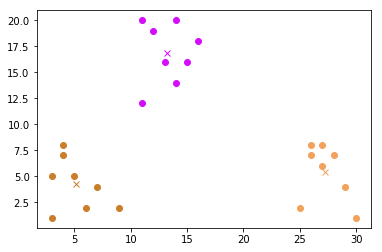

In [77]:
sample = ArraytoCoor(X)
c = kmeans.cluster_centers_
cen = ArraytoCoor(c)
n_clus = set(kmeans.labels_)
number_clusters = len(n_clus) #number of cluster generated
color_of_clusters = gencolor(number_clusters)

#plot datapoints as o point
for i in X:
    i.tolist()
    plt.plot(i[0],i[1],'o',color=color_of_clusters[kmeans.predict([i])[0]])
#plot centroid as X point
for i in range(len(cen[0])):
    n_cen = [cen[0][i],cen[1][i]]
    plt.plot(n_cen[0],n_cen[1],'x',color=color_of_clusters[kmeans.predict([n_cen])[0]])

plt.show()

In [72]:
neigh_km = KNeighborsClassifier(n_neighbors=3)
neigh_km.fit(X.tolist(), kmeans.labels_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

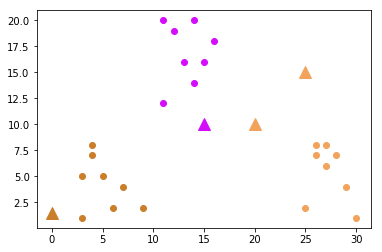

In [84]:
#predict new datapoints
new_dp = [[15,10],[0,1.5],[25,15],[20,10]]
result = neigh_km.predict(new_dp)
coor_dp = ArraytoCoor(new_dp)

for i in range(len(new_dp)):
    n_ = [coor_dp[0][i],coor_dp[1][i]]
    plt.plot(n_[0],n_[1],'^',color=color_of_clusters[result[i]],markersize=12)
    
for i in X:
    i.tolist()
    plt.plot(i[0],i[1],'o',color=color_of_clusters[kmeans.predict([i])[0]])
#plot centroid as X point
'''
for i in range(len(cen[0])):
    n_cen = [cen[0][i],cen[1][i]]
    plt.plot(n_cen[0],n_cen[1],'x',color=color_of_clusters[kmeans.predict([n_cen])[0]])
'''
plt.show()